The steps are broadly:

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

## Read and understand the data

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns    # For statistical data visualization
from datetime import datetime

import warnings
    
warnings.filterwarnings("ignore")

In [2]:
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
df = pd.read_csv('CustomerPurchaseData.csv')

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [5]:
# Display the first few rows of the dataset
print(df.head())

     ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   387        1976     Basic        Married   7500.0        0         0   
1  8373        1979     Basic       Together  24594.0        1         0   
2  5342        1976     Basic       Divorced   9548.0        1         0   
3  2563        1961     Basic        Married  28249.0        0         0   
4  9733        1978     Basic       Together  24882.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    13/11/12       59         6  ...                  8             0   
1    10/12/13       94         1  ...                  5             0   
2    08/08/12       31         0  ...                  8             0   
3    15/06/14       80         1  ...                  6             0   
4    09/09/12       52         1  ...                  6             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0            

### Data Cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64


In [7]:
# Replace NaN values in 'Income' columns with 0

columns_to_replace = ['Income']
df[columns_to_replace] = df[columns_to_replace].fillna(0)

In [8]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [9]:
# Add all the campaign response columns to a single column :

df['Response_sum'] = df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2']+df['Response']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Response_sum
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,0,0,0,0,0,0,3,11,0.0,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,0,0,0,0,0,0,3,11,0.0,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,0,0,0,0,0,0,3,11,0.0,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,0,0,0,0,0,0,3,11,0.0,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,1,0,0,0,0,0,3,11,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8722,1957,Cycle,Married,82347.0,0,0,06/11/12,38,556,...,1,0,0,1,0,0,3,11,1.0,3.0
2235,607,1955,Cycle,Divorced,41769.0,0,1,13/02/13,31,302,...,0,0,0,0,0,0,3,11,0.0,0.0
2236,3661,1995,Cycle,Single,80617.0,0,0,12/10/12,42,594,...,0,0,0,0,0,0,3,11,0.0,0.0
2237,21711,1979,Cycle,Together,7500.0,1,0,07/05/13,7,2,...,0,0,0,0,0,0,3,11,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [11]:
df[df['Response'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Response_sum
70,5255,1986,Graduation,Single,1.0,0,0,20/02/13,19,5,...,0,0,0,0,0,0,3,11,NaN,NaN
78,7244,1951,Graduation,Single,2.0,1,0,01/01/14,96,48,...,0,0,0,0,0,0,3,11,NaN,NaN
85,8557,1982,Graduation,Single,1.0,0,0,17/06/13,57,11,...,0,0,0,0,0,0,3,11,NaN,NaN
105,9235,1957,Graduation,Single,1.0,1,0,27/05/14,45,7,...,0,0,0,0,0,0,3,11,NaN,NaN
124,35034,1963,Graduation,Married,0.0,1,0,11/08/13,96,231,...,0,0,0,0,0,0,3,11,NaN,NaN
213,2437,1989,Graduation,Married,0.0,0,0,03/06/13,69,861,...,0,1,0,1,0,0,3,11,NaN,NaN
218,2863,1970,Graduation,Single,1.0,2,0,23/08/13,67,738,...,0,1,0,1,0,0,3,11,NaN,NaN
748,2902,1958,Graduation,Together,1.0,1,0,03/09/12,87,19,...,0,0,0,0,0,0,3,11,NaN,NaN
1101,5079,1971,Graduation,Married,1.0,1,0,03/03/13,82,71,...,0,0,0,0,0,0,3,11,NaN,NaN
1103,3117,1955,Graduation,Single,0.0,1,0,18/10/13,95,264,...,0,0,0,0,0,0,3,11,NaN,NaN


In [12]:
# Replace remaining null values with 0
df['Response_sum'].fillna(0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [14]:
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue','Response']
for column in columns_to_drop:
    del df[column]


In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response_sum'],
      dtype='object')

## Prepare the data for modelling

R : Recency

F : Frequency

m : Monetary

So, create a new column as : Total_purchases

In [16]:
df['Total_purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

print(df['Total_purchases'])

0        6
1        5
2        6
3        6
4        5
        ..
2234    25
2235    22
2236    19
2237    11
2238     1
Name: Total_purchases, Length: 2239, dtype: int64


In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response_sum', 'Total_purchases'],
      dtype='object')

In [18]:
# Web conversion :

web_conversion = print((df['NumWebPurchases'].sum()/df['NumWebVisitsMonth'].sum())*100)

76.84617323363858


In [19]:
# Get descriptive statistics for numerical columns
print(df.describe())

# Explore categorical columns
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2239.000000  2239.000000    2239.000000  2239.000000  2239.000000   
mean    9149.564538  1968.802144   51412.799464     0.443502     0.500223   
std    10605.188253    11.985494   22069.566611     0.537513     0.543772   
min        0.000000  1893.000000       0.000000     0.000000     0.000000   
25%     3383.500000  1959.000000   34716.000000     0.000000     0.000000   
50%     6019.000000  1970.000000   51039.000000     0.000000     0.000000   
75%     9043.500000  1977.000000   68277.500000     1.000000     1.000000   
max    47392.000000  1996.000000  162397.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2239.000000  2239.000000  2239.000000      2239.000000   
mean     49.121036   304.067441    26.307727       167.016525   
std      28.963662   336.614830    39.781468       225.743829   
min       0.000000     0.000000     0.000000  

In [20]:
# Calculate age until the current year
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Display the modified DataFrame
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response_sum,Total_purchases,Age
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,16,1,2,0,3,8,0,0.0,6,48
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,9,1,1,0,3,5,0,0.0,5,45
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,9,2,1,0,3,8,0,0.0,6,48
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,10,1,2,0,3,6,0,0.0,6,63
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,36,1,1,1,2,6,0,1.0,5,46


In [21]:
del df['Year_Birth']

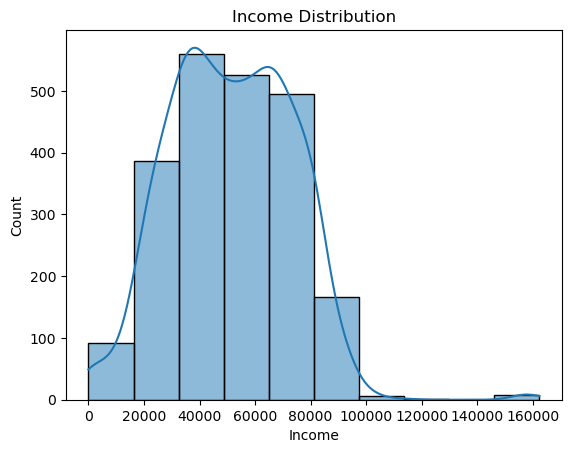

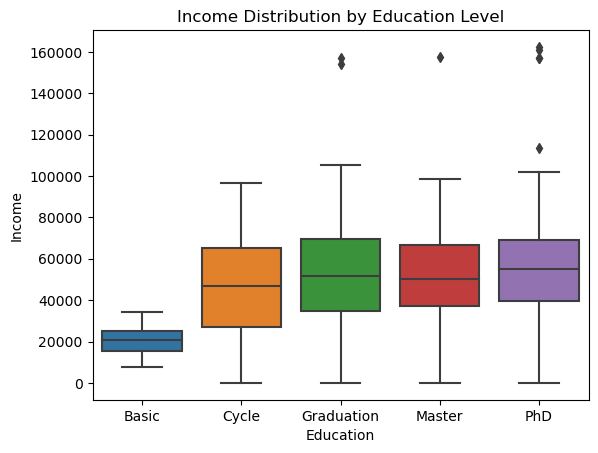

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical variables
sns.histplot(df['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.show()

# Box plots for numerical variables
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.show()


1. Majority of the population fall in the income range of 40000 to 80000
2. People with education level of graduation and above are earning more with some outlier values as well.

### Analysis by Marriage and Education level

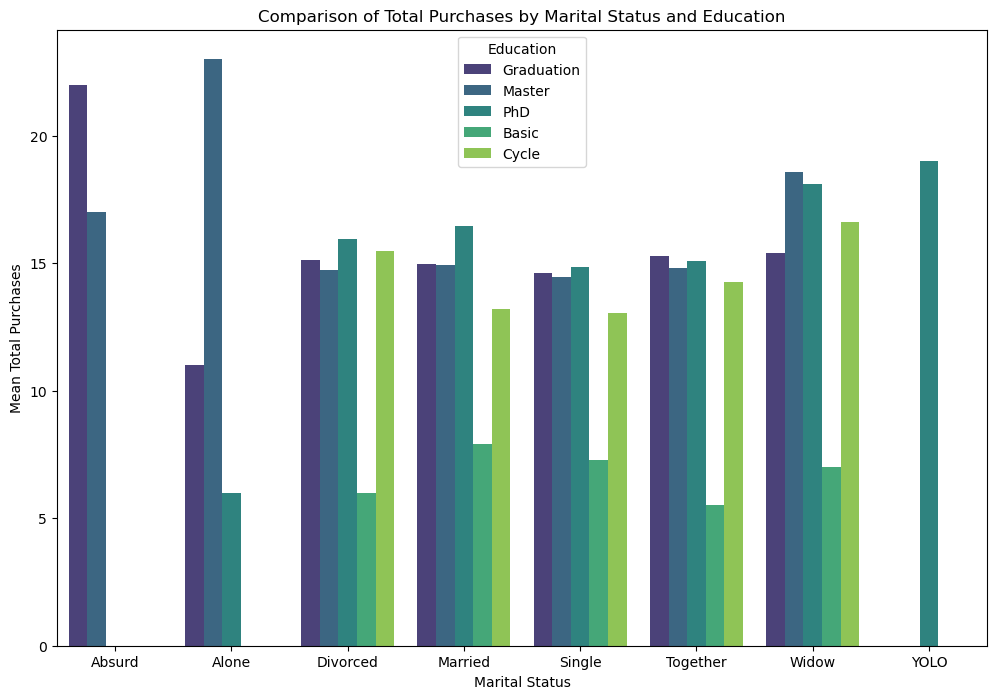

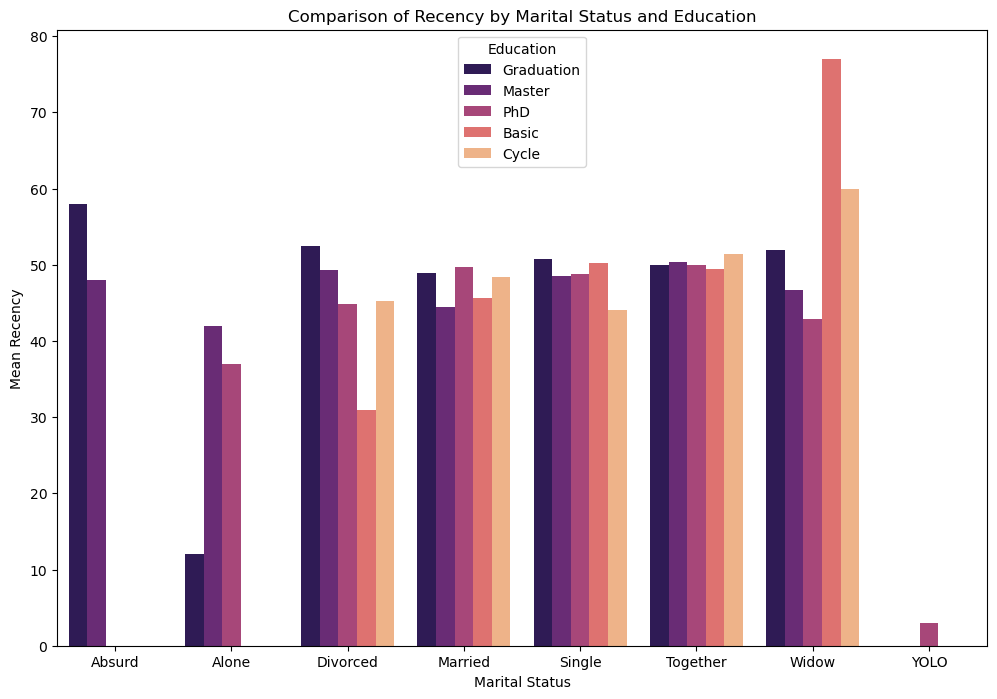

In [23]:
# Select relevant columns for the comparison
comparison_data = df[['Marital_Status', 'Education', 'Total_purchases', 'Recency']]

# Group by Marital Status and Education and calculate mean values
grouped_data = comparison_data.groupby(['Marital_Status', 'Education']).mean().reset_index()

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Total_purchases', hue='Education', data=grouped_data, palette='viridis')
plt.title('Comparison of Total Purchases by Marital Status and Education')
plt.xlabel('Marital Status')
plt.ylabel('Mean Total Purchases')
plt.show()

# Plot a grouped bar chart for Recency
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Recency', hue='Education', data=grouped_data, palette='magma')
plt.title('Comparison of Recency by Marital Status and Education')
plt.xlabel('Marital Status')
plt.ylabel('Mean Recency')
plt.show()

1. Widows with masters and PhD degrees purchase most of the products.
2. Divorced people with a basic degree are the frequent buyers

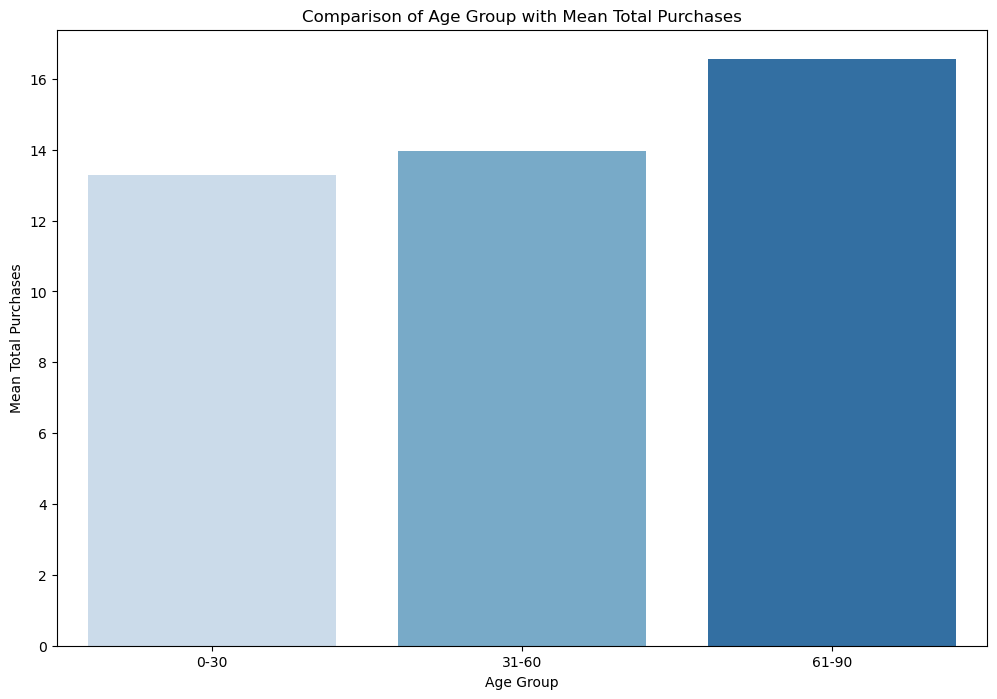

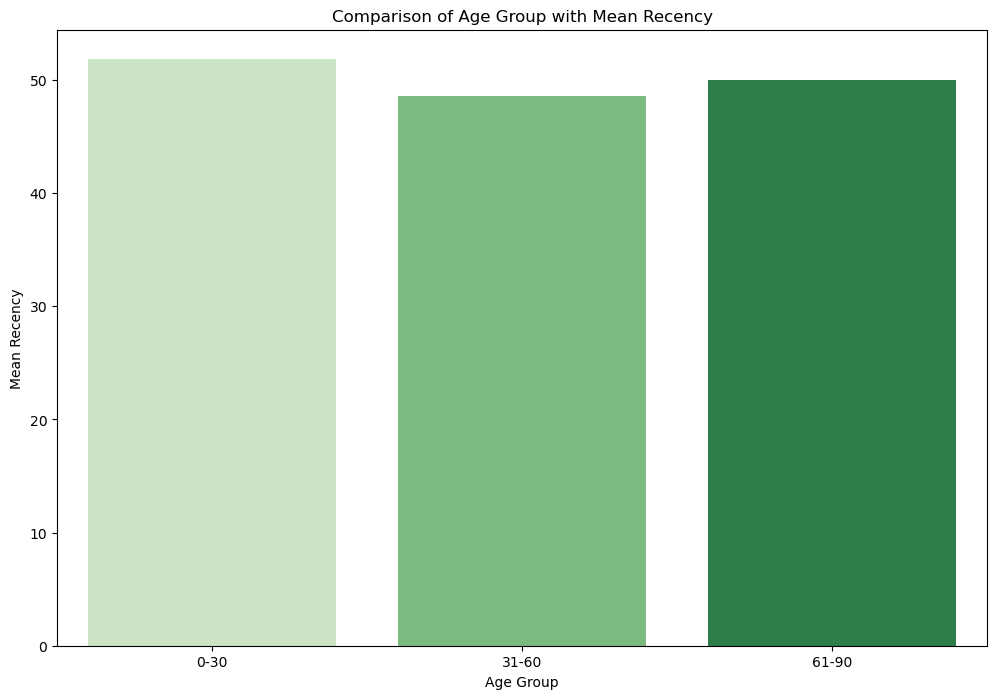

In [24]:
# Bin the Age column into age groups
bins = [0, 30, 60, 90]
labels = ['0-30', '31-60', '61-90']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate mean values
grouped_data_age = df.groupby('Age_Group').mean().reset_index()

# Plot a bar chart for Age Group vs Total Purchases
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Group', y='Total_purchases', data=grouped_data_age, palette='Blues')
plt.title('Comparison of Age Group with Mean Total Purchases')
plt.xlabel('Age Group')
plt.ylabel('Mean Total Purchases')
plt.show()

# Plot a bar chart for Age Group vs Recency
plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Group', y='Recency', data=grouped_data_age, palette='Greens')
plt.title('Comparison of Age Group with Mean Recency')
plt.xlabel('Age Group')
plt.ylabel('Mean Recency')
plt.show()

1. People with age group of 61 and above are the major buyers.
2. Age group between 31 to 60 are the frequent buyers

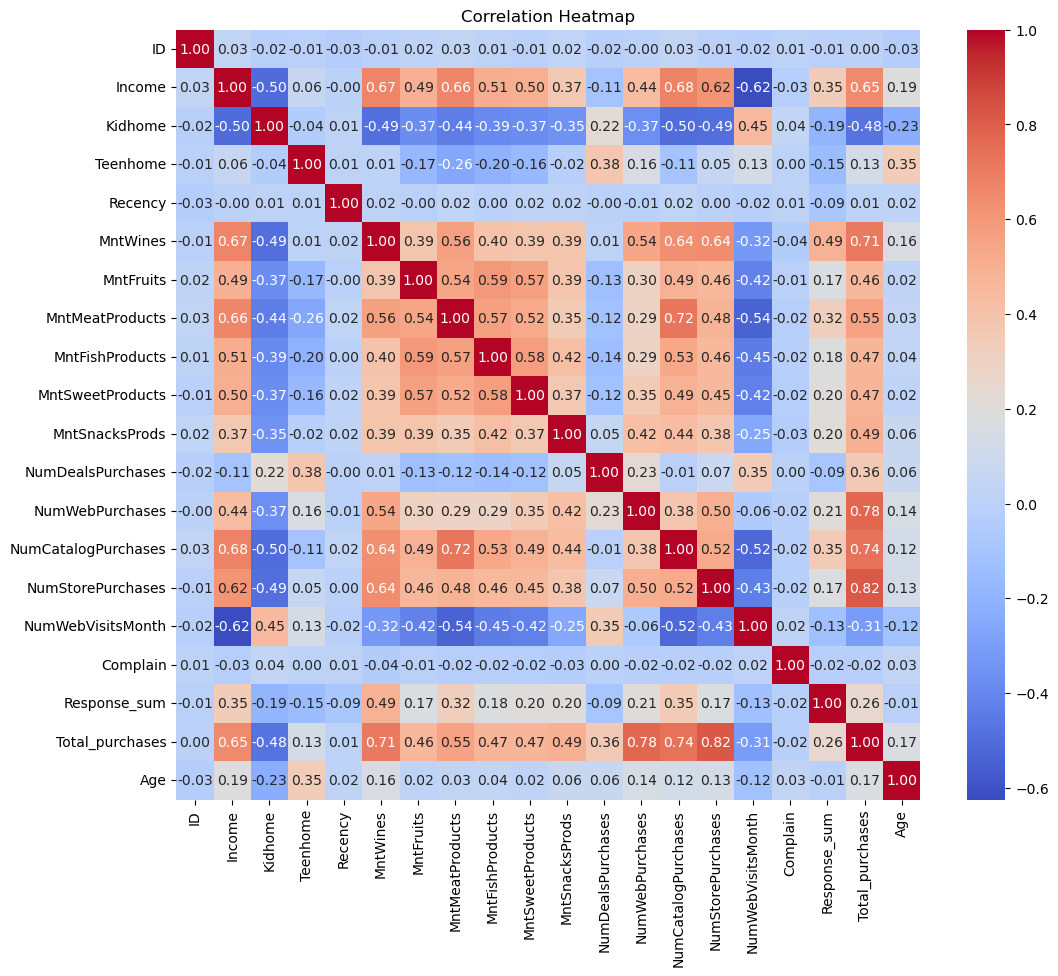

In [25]:
### Descriptive Analysis - Heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. High income people consume more wine and meat products
2. People with high income have more purchase which are mostly done by store and catalogue purchases.
3. These high income people have less website visits but have greater conversion.These people also have responded well to the marketing campaigns.
4. People who have kids in home have more websites visits but their web purchases are very low. These 
5. People who have teens in home have more deals purchases.
6. Wine and meat products are being purhased more from Retailkart and the most frequent mode of purchases are store followed by catalogue purchases.
7. Store purchases are the most

In [26]:
df['Response_sum'].value_counts()

0.0    1634
1.0     369
2.0     139
3.0      51
4.0      36
5.0      10
Name: Response_sum, dtype: int64

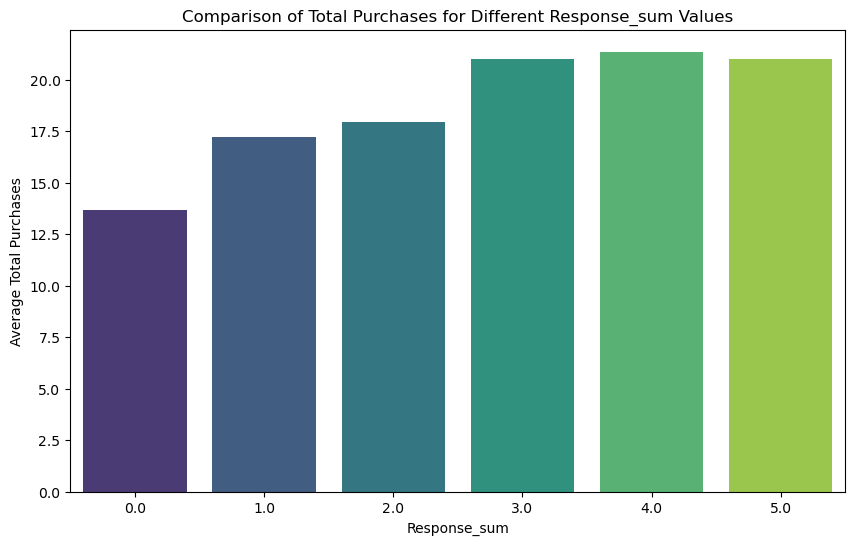

In [27]:
# Create a new DataFrame with relevant columns
data = df[['Response_sum', 'Total_purchases']]

# Group by 'Response_sum' and calculate the mean of 'Total_purchases'
grouped_data = data.groupby('Response_sum')['Total_purchases'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Response_sum', y='Total_purchases', data=grouped_data, palette='viridis')

# Set plot labels and title
plt.xlabel('Response_sum')
plt.ylabel('Average Total Purchases')
plt.title('Comparison of Total Purchases for Different Response_sum Values')

# Show the plot
plt.show()

Customers with more purchases have responded to the campaigns. As it can be shown from the above graph that the people with 3, 4 and 5 campaign response attempts have greater purchases i.e. average value of more than 20

In [28]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response_sum',
       'Total_purchases', 'Age', 'Age_Group'],
      dtype='object')

In [29]:
df.dtypes

ID                        int64
Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntSnacksProds            int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
Complain                  int64
Response_sum            float64
Total_purchases           int64
Age                       int64
Age_Group              category
dtype: object

In [30]:
# Convert all float columns to integers
float_columns = df.select_dtypes(include='float').columns
df[float_columns] = df[float_columns].astype(int)


In [31]:
print(df['Income'].describe())

count      2239.000000
mean      51412.799464
std       22069.566611
min           0.000000
25%       34716.000000
50%       51039.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64


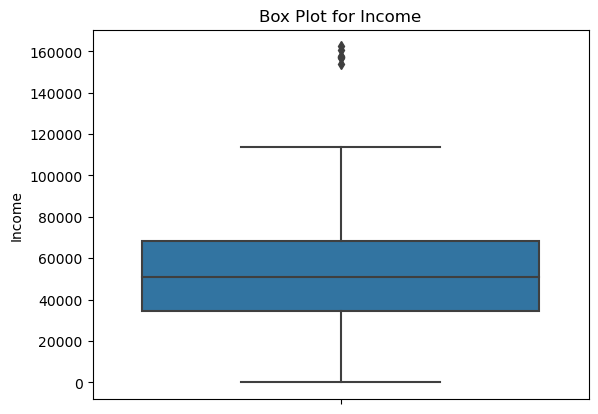

In [32]:
sns.boxplot(y=df['Income'])
plt.title('Box Plot for Income')
plt.show()

In [33]:
print(df['Total_purchases'].describe())

count    2239.000000
mean       14.863778
std         7.678453
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchases, dtype: float64


In [34]:
# Show data recency wise along with customer ID

Response_sum = df.groupby('ID')['Response_sum'].sum()
Response_sum = Response_sum.reset_index()
Response_sum.head()

,ID,Response_sum
0,0,0
1,1,2
2,9,0
3,13,0
4,17,0


In [35]:
sorted_df = Response_sum.sort_values(by='Response_sum')

sorted_df.tail()

,ID,Response_sum
589,3520,5
521,3138,5
93,477,5
1021,5536,5
2203,45184,5


In [36]:
sorted_df.describe()

,ID,Response_sum
count,2238.000000,2238.000000
mean,9148.698391,0.444147
std,10607.479181,0.889143
min,0.000000,0.000000
25%,3382.250000,0.000000
50%,6010.000000,0.000000
75%,9025.250000,1.000000
max,47392.000000,5.000000


In [37]:
sorted_df['Response_sum'].value_counts()

0    1633
1     369
2     139
3      51
4      36
5      10
Name: Response_sum, dtype: int64

In [38]:
# Frequency wise

Frequency = df.groupby('ID')['Total_purchases'].sum()
Frequency = Frequency.reset_index()
Frequency.head()

,ID,Total_purchases
0,0,17
1,1,18
2,9,11
3,13,6
4,17,28


In [39]:
# Monetary wise

Amt = df.groupby('ID')['Income'].mean()
Amt = Amt.reset_index()
Amt.head()

,ID,Income
0,0,70951.0
1,1,57091.0
2,9,46098.0
3,13,25358.0
4,17,60491.0


In [40]:
# check outliers

# Merge the DataFrames based on the 'ID' column
merged_df = pd.merge(Response_sum, Frequency, on='ID')
merged_df = pd.merge(merged_df, Amt, on='ID')

# Display the merged DataFrame
merged_df.head()

,ID,Response_sum,Total_purchases,Income
0,0,0,17,70951.0
1,1,2,18,57091.0
2,9,0,11,46098.0
3,13,0,6,25358.0
4,17,0,28,60491.0


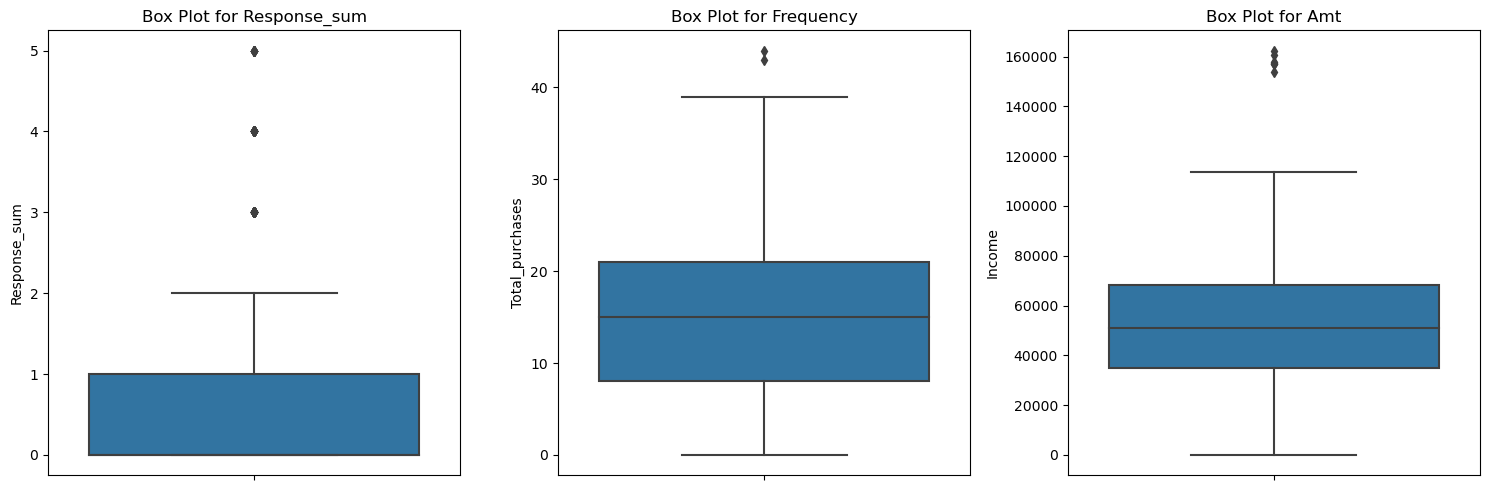

In [41]:
# Check Outliers

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for 'Recency'
sns.boxplot(ax=axes[0], y=merged_df['Response_sum'])
axes[0].set_title('Box Plot for Response_sum')

# Box plot for 'Frequency'
sns.boxplot(ax=axes[1], y=merged_df['Total_purchases'])
axes[1].set_title('Box Plot for Frequency')

# Box plot for 'Amt'
sns.boxplot(ax=axes[2], y=merged_df['Income'])
axes[2].set_title('Box Plot for Amt')

# Adjust layout
plt.tight_layout()

plt.show()

In [42]:
sorted_df = Response_sum.sort_values(by='Response_sum')

sorted_df.tail()

,ID,Response_sum
589,3520,5
521,3138,5
93,477,5
1021,5536,5
2203,45184,5


In [43]:
sorted_df.describe()

,ID,Response_sum
count,2238.000000,2238.000000
mean,9148.698391,0.444147
std,10607.479181,0.889143
min,0.000000,0.000000
25%,3382.250000,0.000000
50%,6010.000000,0.000000
75%,9025.250000,1.000000
max,47392.000000,5.000000


In [44]:
sorted_df['Response_sum'].value_counts()

0    1633
1     369
2     139
3      51
4      36
5      10
Name: Response_sum, dtype: int64

## Modelling

In [45]:
## Let's add Complain to the model and understand which cluster has complains and how to solve them in order to curb the churn

df['Complain'].value_counts()

0    2218
1      21
Name: Complain, dtype: int64

In [46]:
Complain = df.groupby('ID')['Complain'].sum()
Complain = Complain.reset_index()
Complain.head()

,ID,Complain
0,0,0
1,1,0
2,9,0
3,13,0
4,17,0


In [47]:
tr_df = pd.merge(merged_df, Complain, on='ID')
tr_df.head()

,ID,Response_sum,Total_purchases,Income,Complain
0,0,0,17,70951.0,0
1,1,2,18,57091.0,0
2,9,0,11,46098.0,0
3,13,0,6,25358.0,0
4,17,0,28,60491.0,0


In [48]:
# Rescaling
rfm_df = tr_df[['Income', 'Total_purchases', 'Response_sum', 'Complain' ]]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(2238, 4)

In [49]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Income', 'Total_purchases', 'Response_sum', 'Complain' ]
rfm_df_scaled.head()

,Income,Total_purchases,Response_sum,Complain
0,0.885959,0.276973,-0.499634,-0.097326
1,0.257791,0.407032,1.750225,-0.097326
2,-0.240438,-0.503386,-0.499634,-0.097326
3,-1.180424,-1.153684,-0.499634,-0.097326
4,0.411887,1.707630,-0.499634,-0.097326


In [50]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [51]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

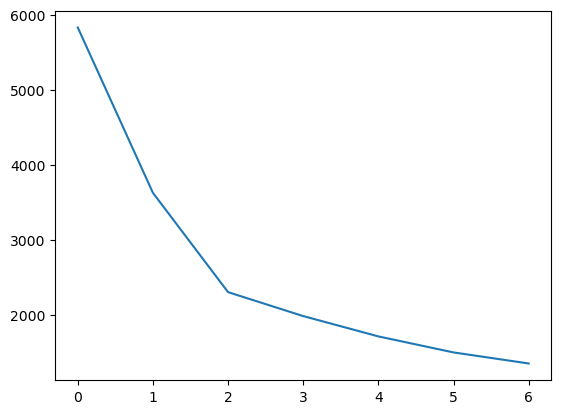

In [52]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [53]:
ssd

[5832.858211677756,
 3625.2183712503565,
 2299.3841716745133,
 1979.7280435767248,
 1708.4671366496136,
 1494.54370895487,
 1347.0326077937611]

In [54]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4302007946204109
For n_clusters=3, the silhouette score is 0.4512382637972478
For n_clusters=4, the silhouette score is 0.4852356812862864
For n_clusters=5, the silhouette score is 0.35463597235802047
For n_clusters=6, the silhouette score is 0.36254086978269107
For n_clusters=7, the silhouette score is 0.3856817250555276
For n_clusters=8, the silhouette score is 0.3277927591366609


In [55]:
# final model with k=2
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [56]:
kmeans.labels_

array([0, 3, 1, ..., 0, 1, 0], dtype=int32)

In [57]:
# assign the label
tr_df['cluster_id'] = kmeans.labels_
tr_df.head()

,ID,Response_sum,Total_purchases,Income,Complain,cluster_id
0,0,0,17,70951.0,0,0
1,1,2,18,57091.0,0,3
2,9,0,11,46098.0,0,1
3,13,0,6,25358.0,0,1
4,17,0,28,60491.0,0,0


<Axes: xlabel='cluster_id', ylabel='Response_sum'>

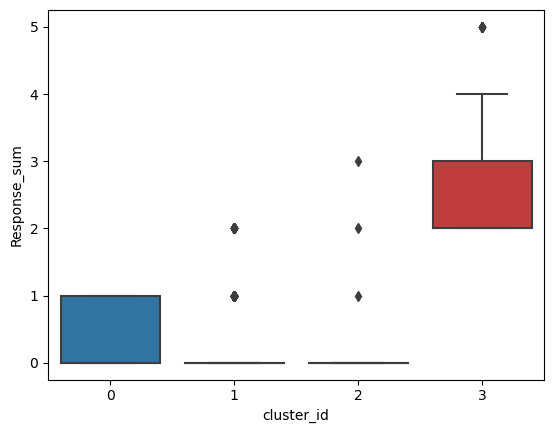

In [58]:
# plot
sns.boxplot(x='cluster_id', y='Response_sum', data=tr_df)

<Axes: xlabel='cluster_id', ylabel='Income'>

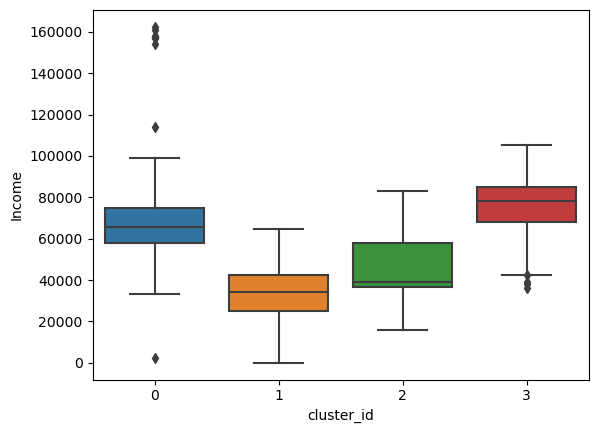

In [59]:
sns.boxplot(x='cluster_id', y='Income', data=tr_df)

<Axes: xlabel='cluster_id', ylabel='Complain'>

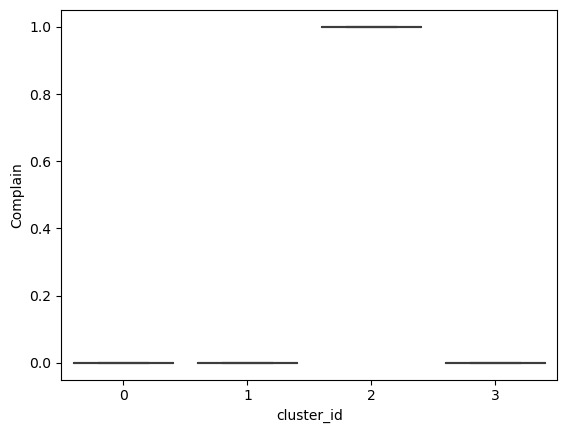

In [60]:
sns.boxplot(x='cluster_id', y='Complain', data=tr_df)

<Axes: xlabel='cluster_id', ylabel='Total_purchases'>

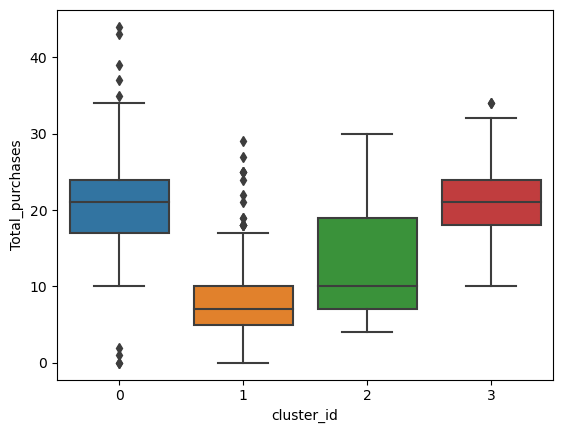

In [61]:
sns.boxplot(x='cluster_id', y='Total_purchases', data=tr_df)

In [62]:
cluster_0_rows = tr_df[tr_df['cluster_id'] == 0]
print(cluster_0_rows.head())
cluster_0_rows.describe()

     ID  Response_sum  Total_purchases   Income  Complain  cluster_id
0     0             0               17  70951.0         0           0
4    17             0               28  60491.0         0           0
8    25             0               21  65148.0         0           0
12   55             0               22  56253.0         0           0
21  115             0               17  43456.0         0           0


,ID,Response_sum,Total_purchases,Income,Complain,cluster_id
count,958.000000,958.000000,958.000000,958.000000,958.0,958.0
mean,9457.980167,0.259916,20.921712,66325.820459,0.0,0.0
std,10978.954002,0.438818,4.904642,14271.904077,0.0,0.0
min,0.000000,0.000000,0.000000,2447.000000,0.0,0.0
25%,3433.250000,0.000000,17.000000,57657.750000,0.0,0.0
50%,6201.000000,0.000000,21.000000,65741.000000,0.0,0.0
75%,9208.250000,1.000000,24.000000,74782.750000,0.0,0.0
max,47392.000000,1.000000,44.000000,162397.000000,0.0,0.0


In [63]:
cluster_1_rows = tr_df[tr_df['cluster_id'] == 1]
print(cluster_1_rows.head())
cluster_1_rows.describe()

   ID  Response_sum  Total_purchases   Income  Complain  cluster_id
2   9             0               11  46098.0         0           1
3  13             0                6  25358.0         0           1
5  20             0                8  46891.0         0           1
6  22             0               14  46310.0         0           1
7  24             0               12  17144.0         0           1


,ID,Response_sum,Total_purchases,Income,Complain,cluster_id
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.0,1055.0
mean,8921.765877,0.169668,8.215166,33330.874882,0.0,1.0
std,10281.037185,0.444905,3.674900,12639.215904,0.0,0.0
min,9.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,3297.000000,0.000000,5.000000,25153.000000,0.0,1.0
50%,5966.000000,0.000000,7.000000,34176.000000,0.0,1.0
75%,8837.000000,0.000000,10.000000,42344.000000,0.0,1.0
max,47279.000000,2.000000,29.000000,64587.000000,0.0,1.0


In [64]:
cluster_2_rows = tr_df[tr_df['cluster_id'] == 2]
print(cluster_2_rows.head())
cluster_2_rows.describe()

       ID  Response_sum  Total_purchases   Income  Complain  cluster_id
52    255             0                6  22263.0         1           2
72    359             0               19  48070.0         1           2
467  2875             0               24  67023.0         1           2
517  3120             0                4  38547.0         1           2
630  3710             1                7  39684.0         1           2


,ID,Response_sum,Total_purchases,Income,Complain,cluster_id
count,21.000000,21.000000,21.000000,21.000000,21.0,21.0
mean,9998.952381,0.285714,13.238095,45242.285714,1.0,2.0
std,10172.027834,0.783764,8.472926,19223.158027,0.0,0.0
min,255.000000,0.000000,4.000000,15716.000000,1.0,2.0
25%,4427.000000,0.000000,7.000000,36640.000000,1.0,2.0
50%,6742.000000,0.000000,10.000000,38998.000000,1.0,2.0
75%,9500.000000,0.000000,19.000000,58113.000000,1.0,2.0
max,36991.000000,3.000000,30.000000,83257.000000,1.0,2.0


In [65]:
cluster_3_rows = tr_df[tr_df['cluster_id'] == 3]
print(cluster_3_rows.head())
cluster_3_rows.describe()

     ID  Response_sum  Total_purchases   Income  Complain  cluster_id
1     1             2               18  57091.0         0           3
27  158             2               17  71604.0         0           3
29  175             2               22  71952.0         0           3
35  195             2               14  38808.0         0           3
69  339             2               18  57091.0         0           3


,ID,Response_sum,Total_purchases,Income,Complain,cluster_id
count,204.000000,204.000000,204.000000,204.000000,204.0,204.0
mean,8782.357843,2.745098,21.039216,75420.328431,0.0,3.0
std,10570.983997,0.917120,4.431018,14460.759811,0.0,0.0
min,1.000000,2.000000,10.000000,36130.000000,0.0,3.0
25%,3180.000000,2.000000,18.000000,67930.000000,0.0,3.0
50%,5293.000000,2.000000,21.000000,78277.500000,0.0,3.0
75%,9022.000000,3.000000,24.000000,84875.250000,0.0,3.0
max,45229.000000,5.000000,34.000000,105471.000000,0.0,3.0


### Above observations :

1. Cluster 0 has total 958 customers and campaign response with mean value of 0.26, average frequency of purchase is 20.92 and has an average income of	66325 with maximum income of 162397 along with maximum purchase of 44.

2. Cluster 2 has 1055 customers and has an average response rate of 0.17 and 	average purchase of just 8.2 and has the lowest average income form all clusters i.e. 33330. Also this cluster has no complains.

3. Cluster 1 has 204 customers and has highest campaign response with an average of 2.74 and also has highest purchase average of 21.03 along with an average income of 75420

4. There are 21 people who have complains and they fall in cluster 3 who has average purchase of 13 and campaign response of 0.28 as the mean value.

5. The marketing focus more on cluster 1 which is a high potential cluster and cluster 0 is also quite similar but they have very less responses towards the marketig campiagns. So the team can apply some more niche marketimg strategy for more conversion from this cluster.

6. The management also should focus on solving the complains of cluster 3 and provide some coupons or offers in order to prevent them leaving the platform.

1. Merge the cluster data and main df data to a new df.
2. Do EDA analysis cluster wise

In [66]:
# Merge the DataFrames on the 'ID' column
final_df = pd.merge(df, tr_df, on='ID', how='inner')

final_df.head()

,ID,Education,Marital_Status,Income_x,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain_x,Response_sum_x,Total_purchases_x,Age,Age_Group,Response_sum_y,Total_purchases_y,Income_y,Complain_y,cluster_id
0,387,Basic,Married,7500,0,0,13/11/12,59,6,16,...,0,0,6,48,31-60,0,6,7500.0,0,1
1,8373,Basic,Together,24594,1,0,10/12/13,94,1,3,...,0,0,5,45,31-60,0,5,24594.0,0,1
2,5342,Basic,Divorced,9548,1,0,08/08/12,31,0,1,...,0,0,6,48,31-60,0,6,9548.0,0,1
3,2563,Basic,Married,28249,0,0,15/06/14,80,1,9,...,0,0,6,63,61-90,0,6,28249.0,0,1
4,9733,Basic,Together,24882,1,0,09/09/12,52,1,4,...,0,1,5,46,31-60,1,5,24882.0,0,1


In [67]:
# List of columns to drop
columns_to_drop = ['Complain_x', 'Response_sum_x', 'Total_purchases_x', 'Income_x']

# Drop the specified columns
final_df = final_df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(final_df)

         ID Education Marital_Status  Kidhome  Teenhome Dt_Customer  Recency  \
0       387     Basic        Married        0         0    13/11/12       59   
1      8373     Basic       Together        1         0    10/12/13       94   
2      5342     Basic       Divorced        1         0    08/08/12       31   
3      2563     Basic        Married        0         0    15/06/14       80   
4      9733     Basic       Together        1         0    09/09/12       52   
...     ...       ...            ...      ...       ...         ...      ...   
2234   8722     Cycle        Married        0         0    06/11/12       38   
2235    607     Cycle       Divorced        0         1    13/02/13       31   
2236   3661     Cycle         Single        0         0    12/10/12       42   
2237  21711     Cycle       Together        1         0    07/05/13        7   
2238   8720     Cycle       Together        0         0    12/08/12       53   

      MntWines  MntFruits  MntMeatProdu

In [68]:
final_df.columns

Index(['ID', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Age_Group',
       'Response_sum_y', 'Total_purchases_y', 'Income_y', 'Complain_y',
       'cluster_id'],
      dtype='object')

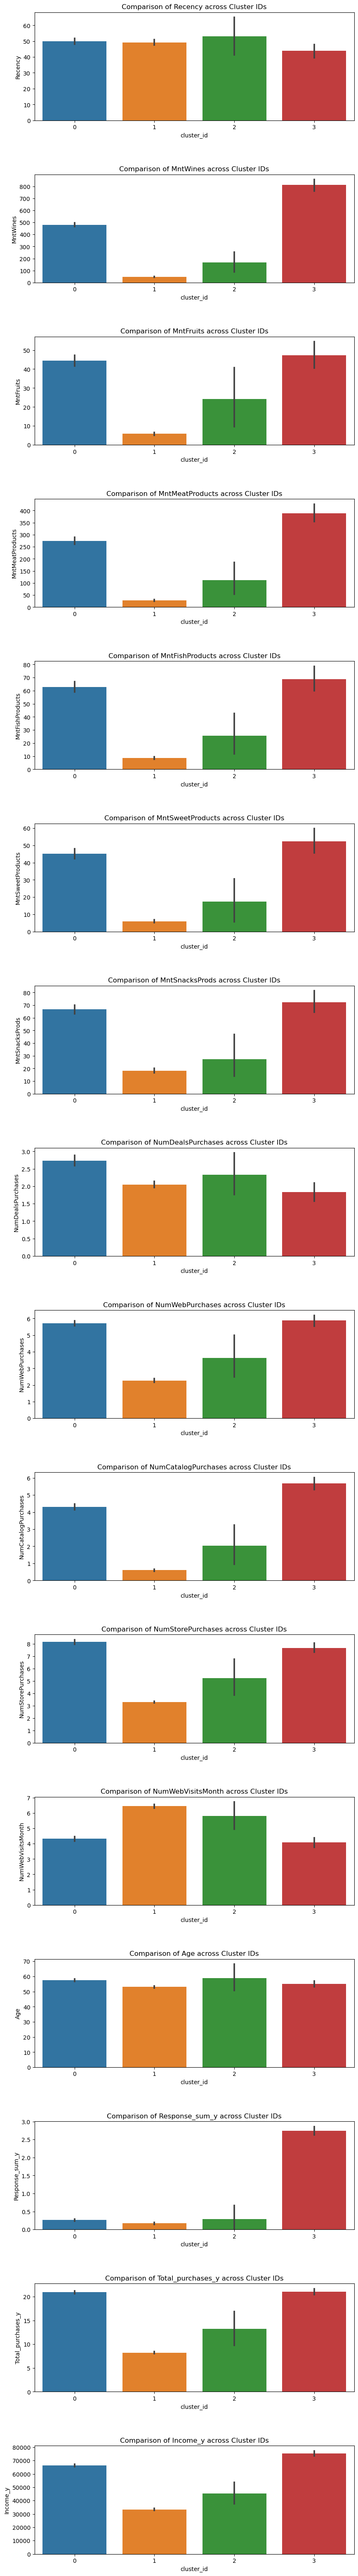

In [69]:
# Assuming 'final_df' is your DataFrame

# Select numerical columns for comparison
numerical_columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Response_sum_y',
                      'Total_purchases_y', 'Income_y']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical column and create a bar plot
for i, col in enumerate(numerical_columns):
    sns.barplot(x='cluster_id', y=col, data=final_df, ax=axes[i])
    axes[i].set_title(f'Comparison of {col} across Cluster IDs')

# Show the plots
plt.show()

In [70]:
# Group by 'cluster_id' and calculate the mean for each group
cluster_means = final_df.groupby('cluster_id').mean()

# Display the mean values for each column grouped by 'cluster_id'
cluster_means.head()

,ID,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntSnacksProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Response_sum_y,Total_purchases_y,Income_y,Complain_y
cluster_id,,,,,,,,,,,,,,,,,,,,
0,9459.679875,0.178311,0.598540,49.992701,481.197080,44.423358,274.692388,62.869656,45.177268,66.650678,2.733055,5.713243,4.301356,8.152242,4.321168,57.499479,0.260688,20.935349,66333.003128,0.0
1,8921.765877,0.747867,0.450237,49.246445,47.635071,5.811374,27.402844,8.675829,5.917536,18.343128,2.048341,2.268246,0.604739,3.293839,6.449289,53.037915,0.169668,8.215166,33330.874882,0.0
2,9998.952381,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524,58.904762,0.285714,13.238095,45242.285714,1.0
3,8782.357843,0.093137,0.294118,43.970588,811.446078,47.362745,388.470588,68.936275,52.372549,72.303922,1.828431,5.877451,5.666667,7.666667,4.083333,55.166667,2.745098,21.039216,75420.328431,0.0


In [200]:
print(cluster_means)

                     ID   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
cluster_id                                                                      
0           9459.679875  0.178311  0.598540  49.992701  481.197080  44.423358   
1           8921.765877  0.747867  0.450237  49.246445   47.635071   5.811374   
2           9998.952381  0.666667  0.523810  53.047619  169.000000  24.190476   
3           8782.357843  0.093137  0.294118  43.970588  811.446078  47.362745   

            MntMeatProducts  MntFishProducts  MntSweetProducts  \
cluster_id                                                       
0                274.692388        62.869656         45.177268   
1                 27.402844         8.675829          5.917536   
2                112.476190        25.761905         17.523810   
3                388.470588        68.936275         52.372549   

            MntSnacksProds  NumDealsPurchases  NumWebPurchases  \
cluster_id                                        

### Observations :

- Cluster 0 has more deals purchases with mean value of 2.73 i.e. they respond to the campaigns  but only with some discounts or offers, followed by cluster 3 with mean value of 2.33
- As expected cluster 0 has more store purchses followed by cluster 1 as they are more active with campign responses.
- Surprisingly cluster 2 has more web visits followed by cluster 3 and 0.
- Average age group of cluster 3 is 59 years and this segment consists of 21 people who has complains. As the below pie chart shows these customers buy more wine and followed by meat products.
- Cluster 2 has customers with more recent purchases i.e. most of the new cusomer fall in this category.

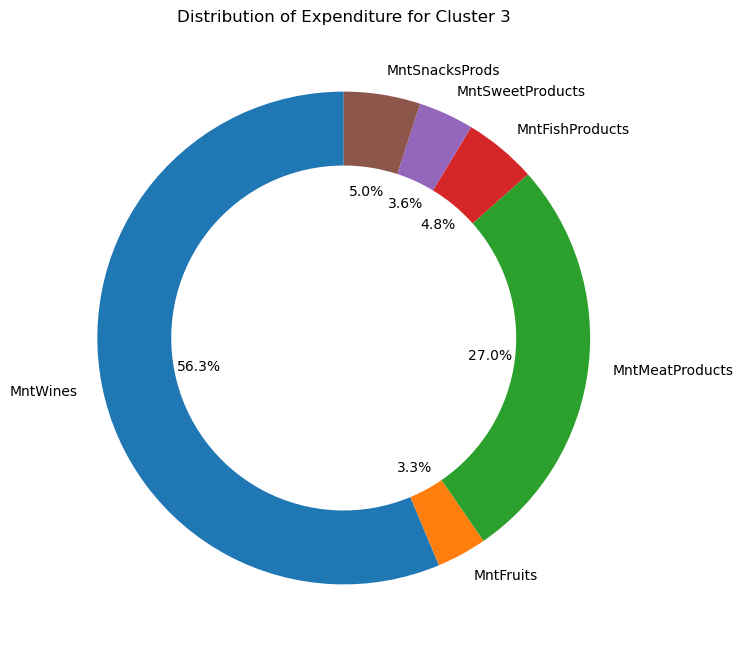

In [71]:
# Filter rows where 'cluster_id' is 3
cluster_3_df = final_df[final_df['cluster_id'] == 3]

# Select the columns for the chart
columns_for_chart = ['MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntSnacksProds']

# Sum the values for each column
sum_values = cluster_3_df[columns_for_chart].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sum_values, labels=sum_values.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Expenditure for Cluster 3')
plt.show()

# Customer Churn

In [97]:
uab = pd.read_csv('User+App+Behaviour.csv')
uab

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [98]:
uab.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [99]:
uab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [101]:
# Check for missing value percentages
missing_percentage = (uab.isnull().sum() / len(uab)) * 100

# Display missing value percentages
print("Missing Value Percentages:")
print(missing_percentage)

# Replace missing values in numerical columns with the mean
numerical_columns = uab.select_dtypes(include=['float64']).columns
uab[numerical_columns] = uab[numerical_columns].fillna(uab[numerical_columns].mean())

# Verify that missing values have been replaced
print("\nAfter replacing missing values:")
print(uab.isnull().sum())

Missing Value Percentages:
CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

After replacing missing values:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice      

<Figure size 1200x600 with 0 Axes>

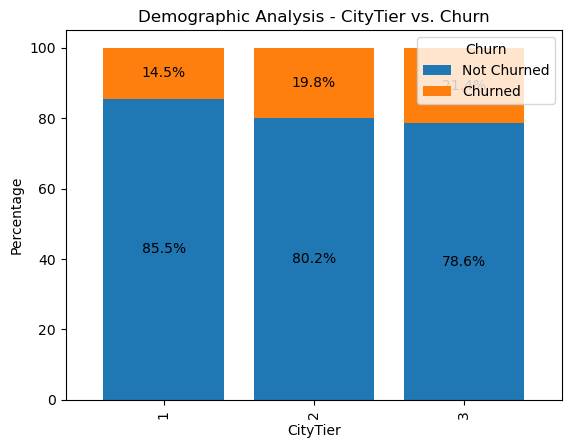

<Figure size 1200x600 with 0 Axes>

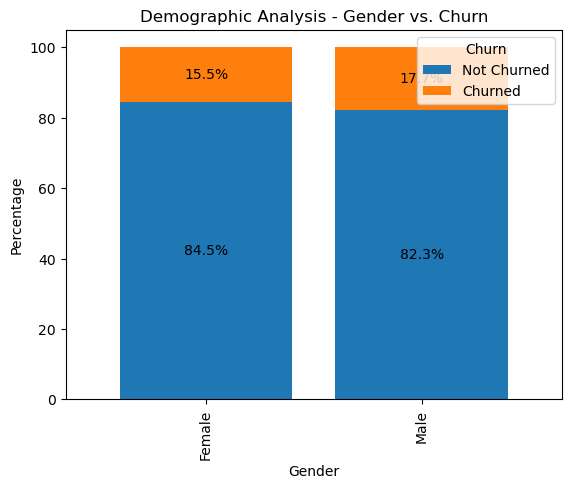

<Figure size 1200x600 with 0 Axes>

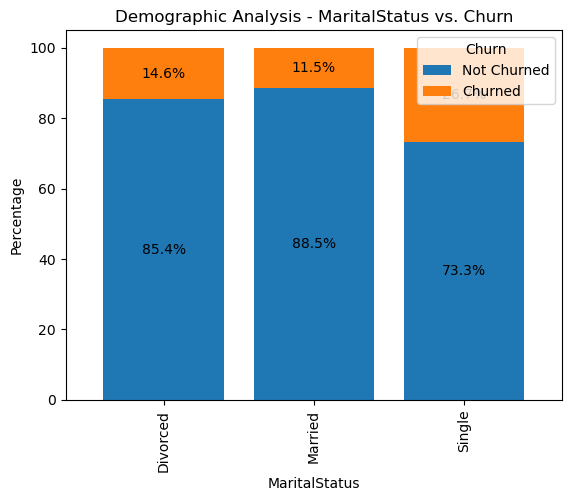

<Figure size 1200x600 with 0 Axes>

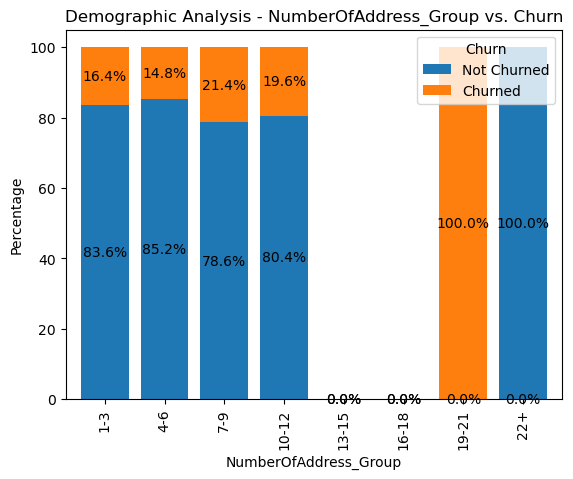

<Figure size 1200x600 with 0 Axes>

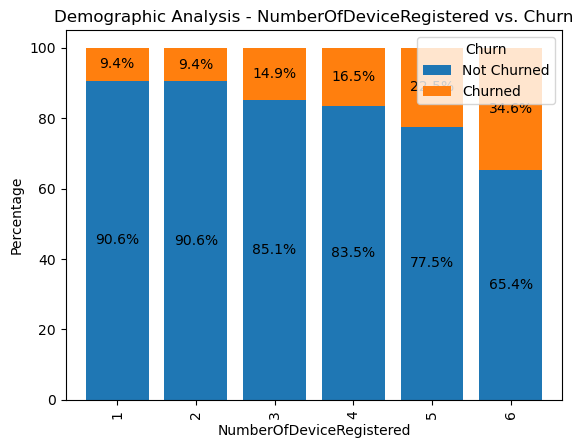

<Figure size 1200x600 with 0 Axes>

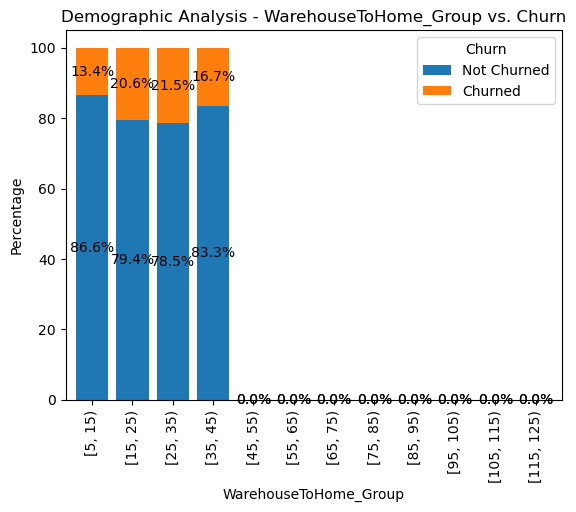

In [132]:
import numpy as np

# Create frequency groups for 'NumberOfAddress' and 'WarehouseToHome'
uab['NumberOfAddress_Group'] = pd.cut(uab['NumberOfAddress'], bins=[1, 3, 6, 9, 12, 15, 18, 21, 24], right=False, labels=['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22+'])
uab['WarehouseToHome_Group'] = pd.cut(uab['WarehouseToHome'], bins=np.arange(5, 128, 10), right=False)

# Demographics analysis with percentage labels
demographics_cols = ['CityTier', 'Gender', 'MaritalStatus', 'NumberOfAddress_Group', 'NumberOfDeviceRegistered', 'WarehouseToHome_Group']
for col in demographics_cols:
    plt.figure(figsize=(12, 6))
    
    # Count the occurrences of each category
    count_df = uab.groupby([col, 'Churn']).size().unstack()
    
    # Calculate the percentage of each category within the 'Churn' groups
    count_df_percentage = count_df.div(count_df.sum(axis=1), axis=0) * 100
    
    # Plot the grouped bar plot
    count_df_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
    
    # Add percentage labels
    for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        plt.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center')
    
    plt.title(f'Demographic Analysis - {col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
    plt.show()

# Remove the created columns
uab.drop(['NumberOfAddress_Group', 'WarehouseToHome_Group'], axis=1, inplace=True)


### Observations with Demographic analysis

- Customers with distance between 15 to 35 kms from warehouse to home have more churn rate. That means more the distance the churn rate is more.
- Customers with more number of registered device have got churned more as the chart shows.
- Customers with more number of addresss have got churned more. There may be a cause of unstable residency and transfer due to some personal or proffessional reasons.
- As per the marital staus single customers have more churn rate which is 26.7% where as married customers have very less churn rate i.e. 11.5%
- Gender wise ther is not much difference, while males have slightly high churn percentage i.e. of 17.7%.
- Tier 3 cities have more churn rate i.e. 21.4% followed by tier 2 city with 19.4% churn rate.

In [164]:
# The column Preferesdordercategory has mobile and mobilephones both. So need to be replaced.

# Replace 'mobile phones' with 'mobiles' in the 'PreferedOrderCat' column
uab['PreferedOrderCat'] = uab['PreferedOrderCat'].replace('Mobile phone', 'Mobile')

In [166]:
uab['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

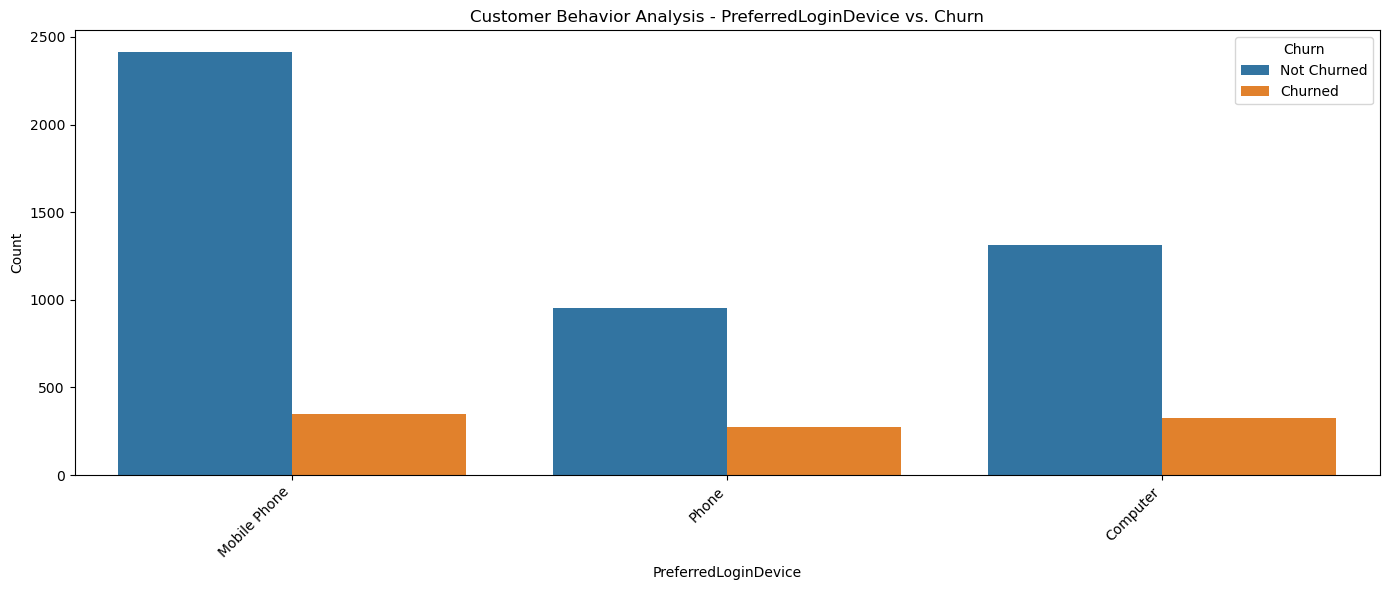

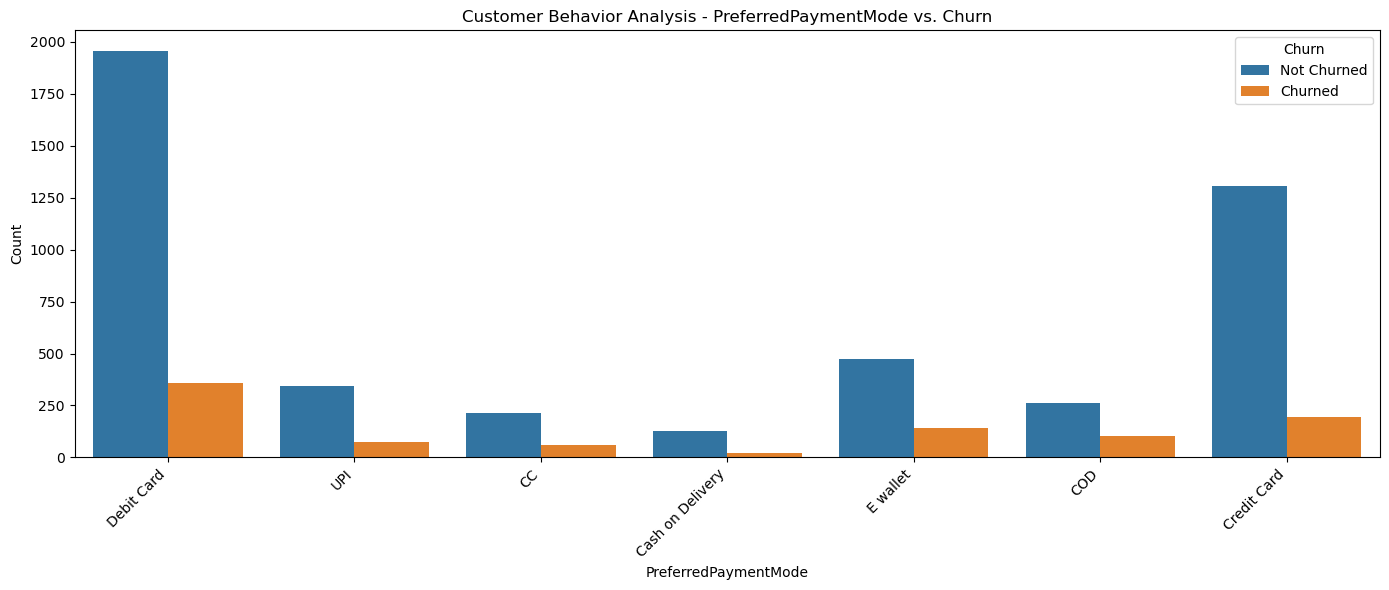

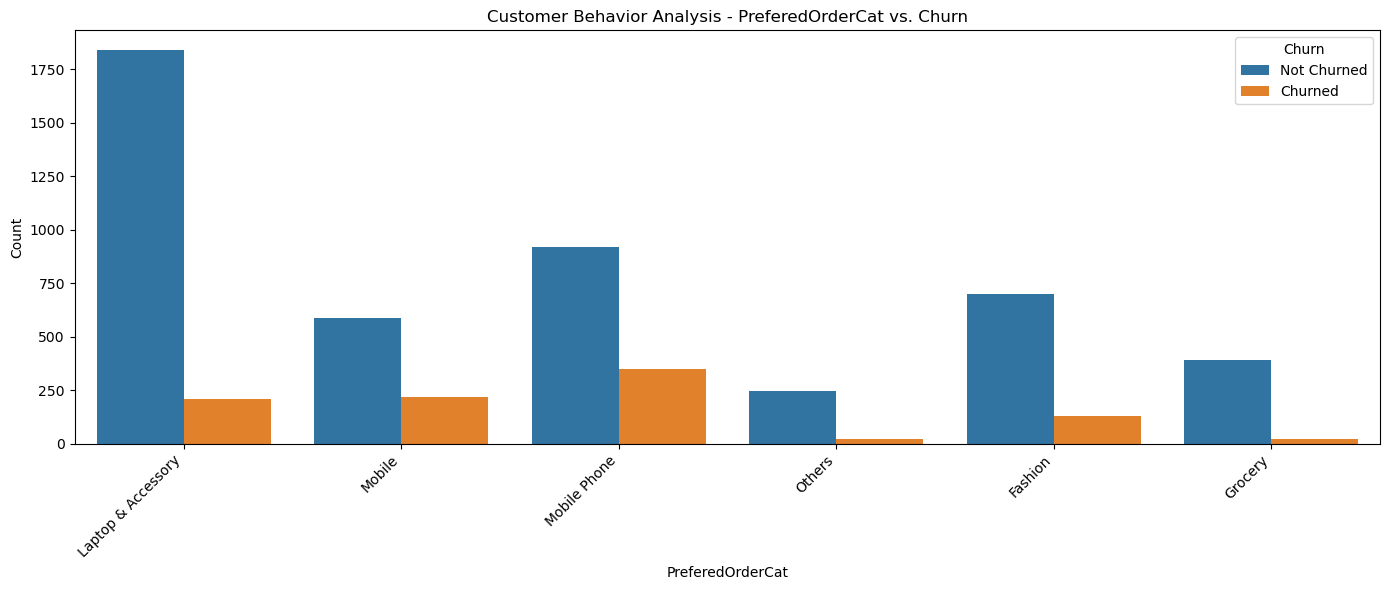

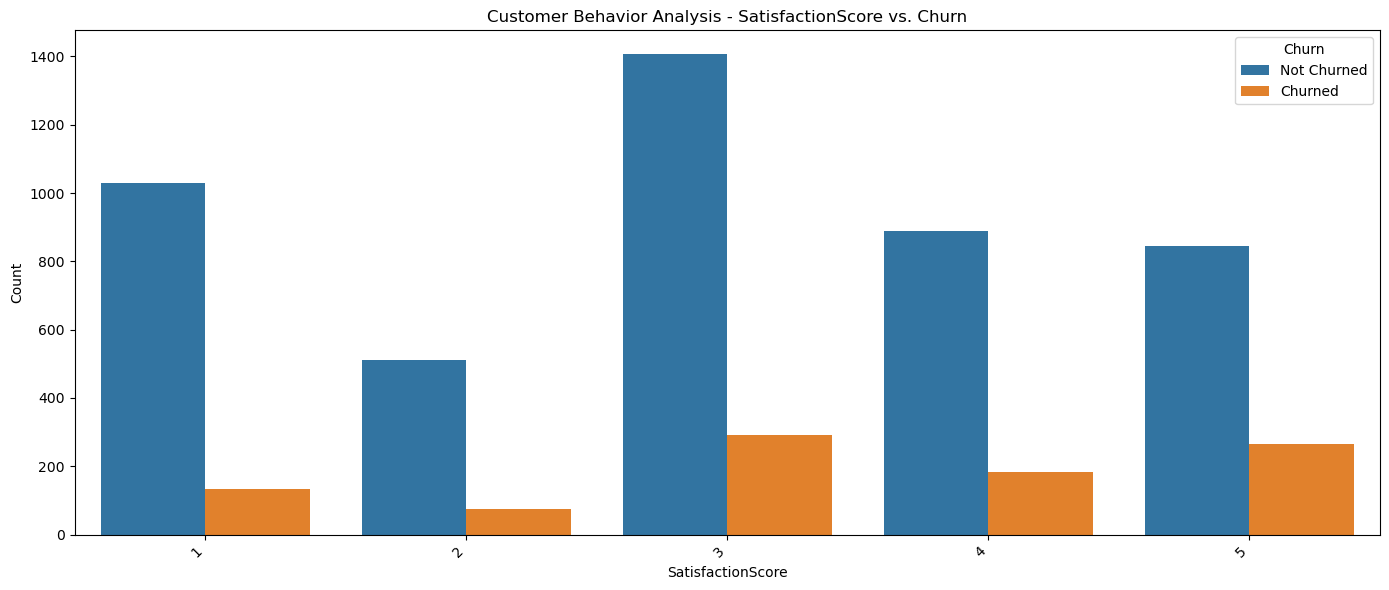

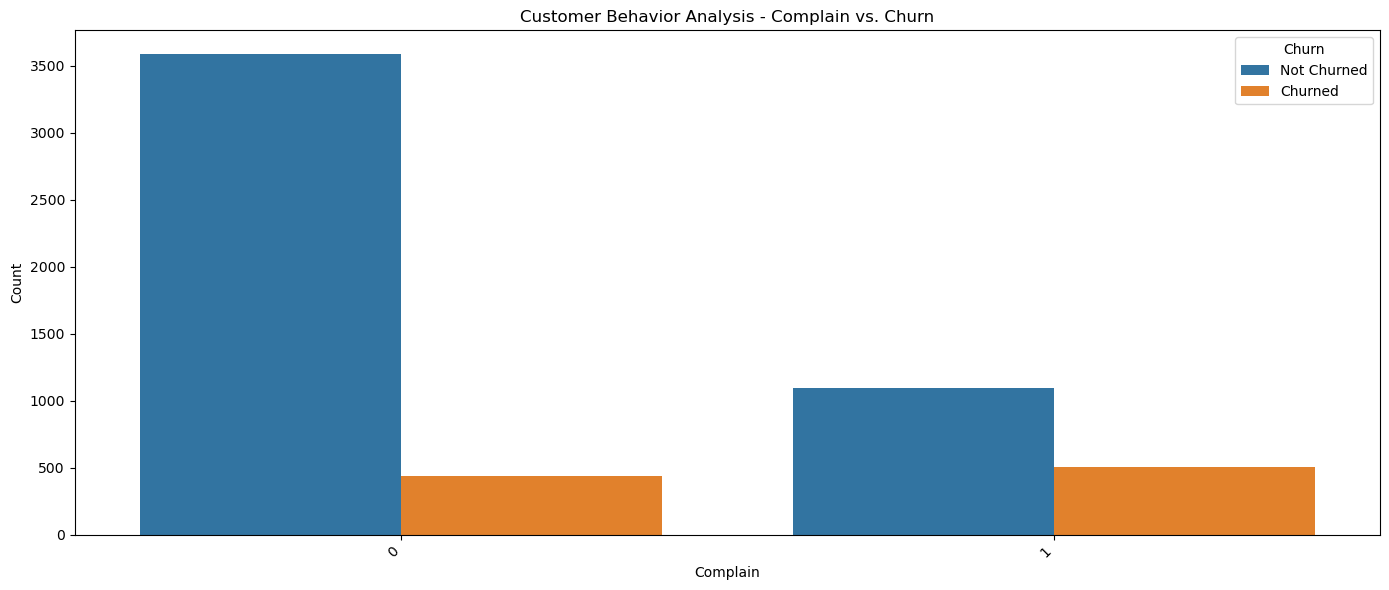

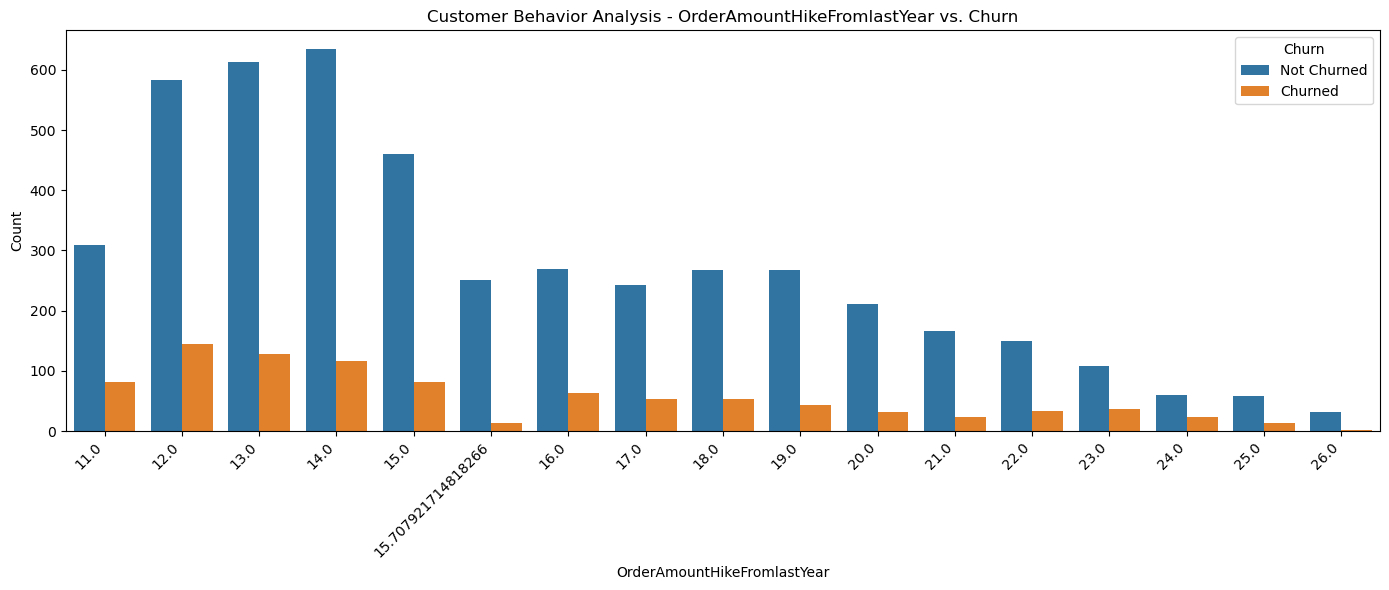

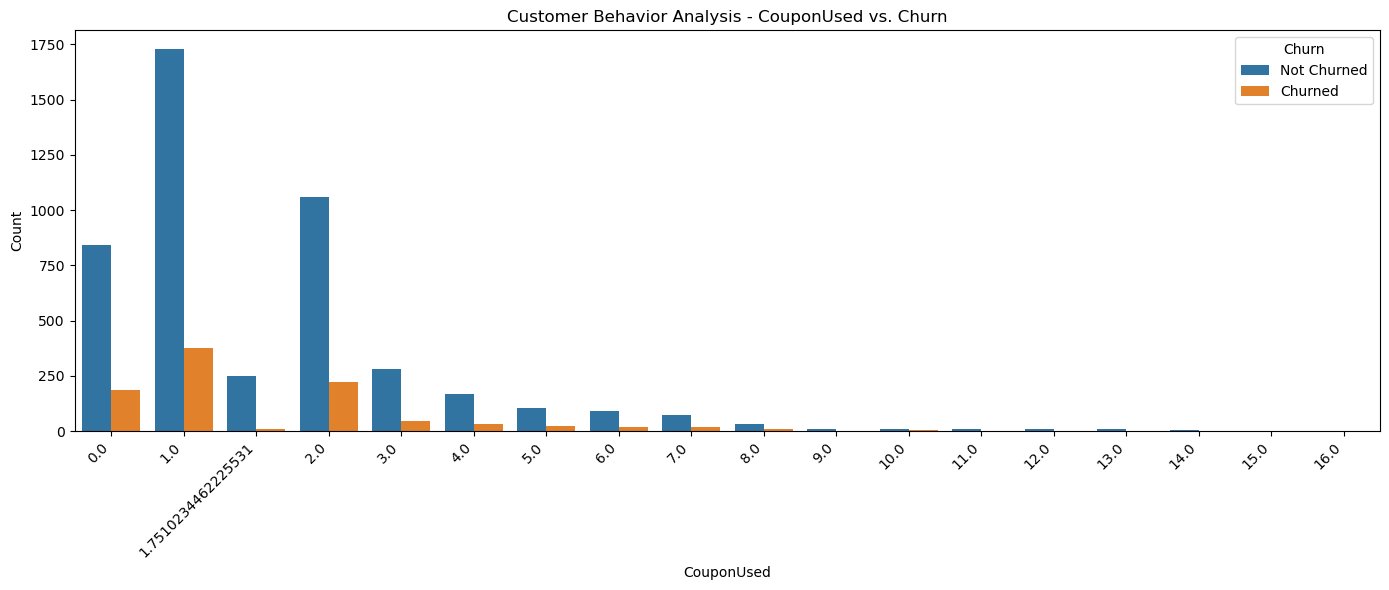

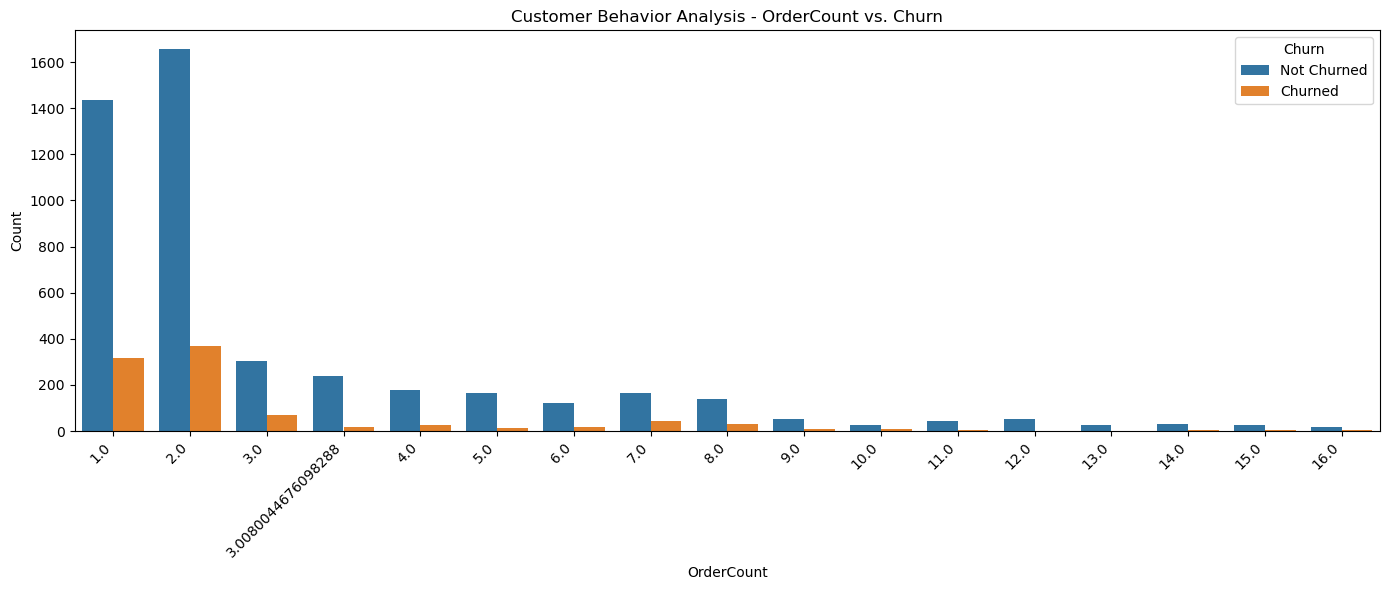

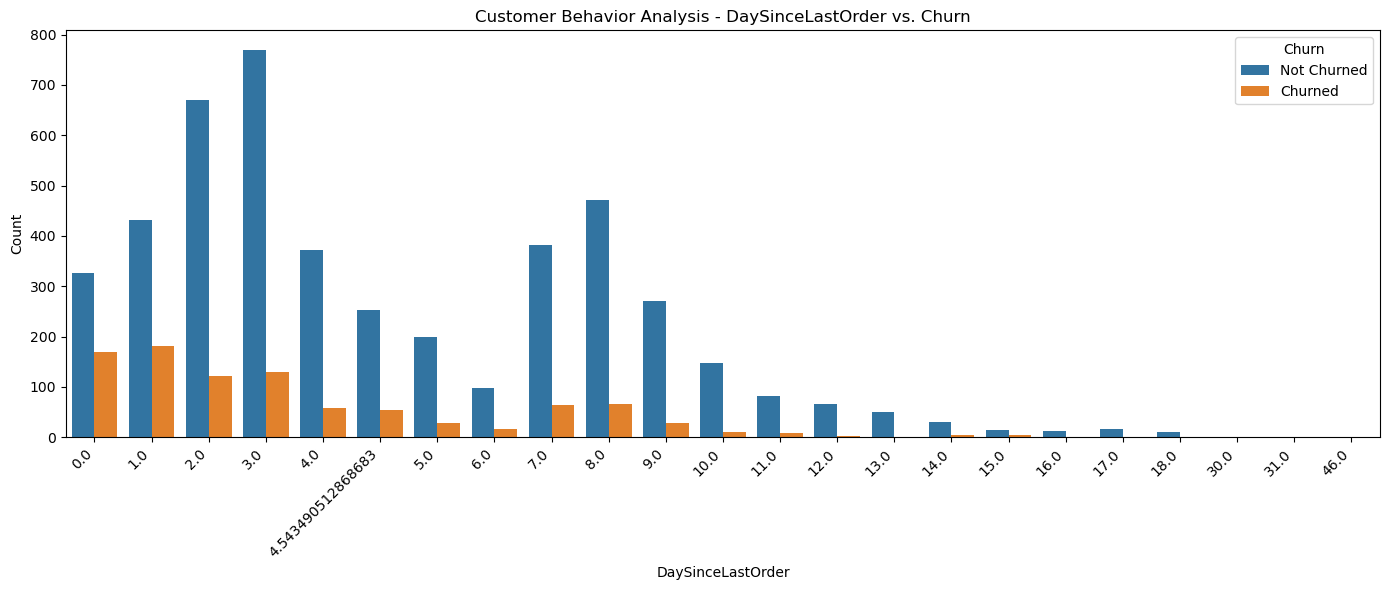

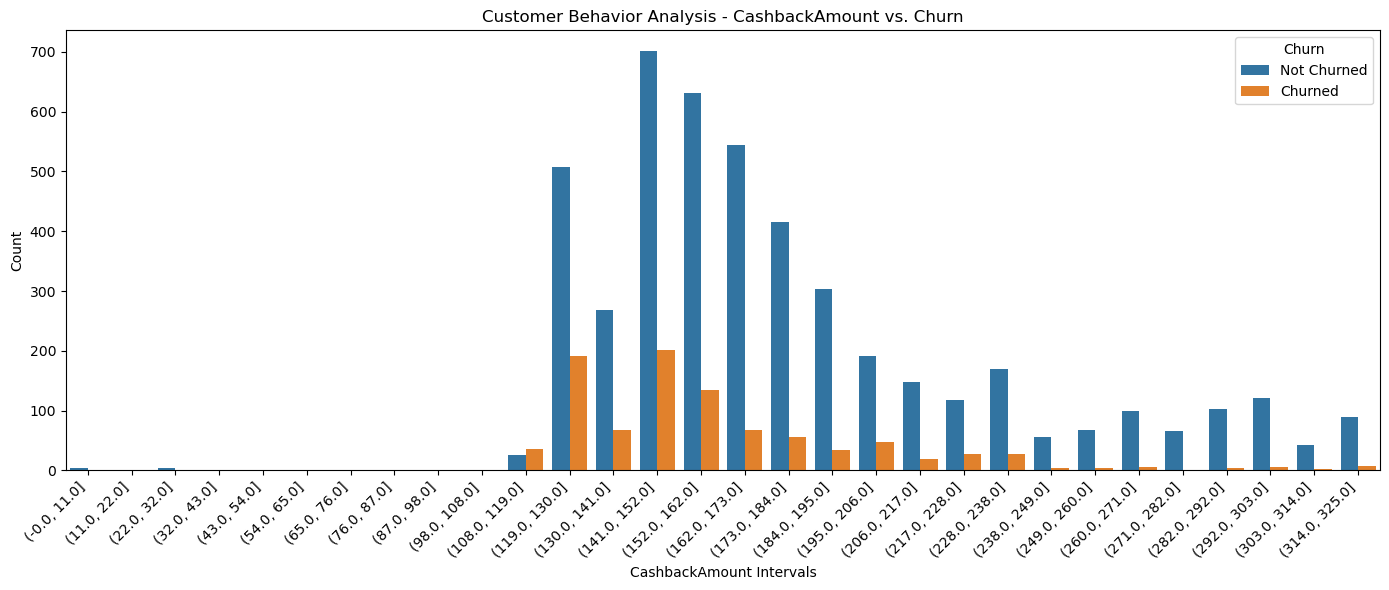

In [165]:
# Behavior analysis with improved bar plots and grouped CashbackAmount
behavior_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'SatisfactionScore', 
                  'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for col in behavior_cols:
    plt.figure(figsize=(14, 6))
    
    # Handle 'CashbackAmount' separately
    if col == 'CashbackAmount':
        # Create 30 intervals for 'CashbackAmount'
        uab['CashbackAmount_Group'] = pd.cut(uab['CashbackAmount'], bins=30, precision=0)
        sns.countplot(x='CashbackAmount_Group', hue='Churn', data=uab)
        plt.title(f'Customer Behavior Analysis - {col} vs. Churn')
        plt.xlabel('CashbackAmount Intervals')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.legend(title='Churn', labels=['Not Churned', 'Churned'], loc='upper right')  # Adjust legend position
    else:
        sns.countplot(x=col, hue='Churn', data=uab)
        plt.title(f'Customer Behavior Analysis - {col} vs. Churn')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.legend(title='Churn', labels=['Not Churned', 'Churned'], loc='upper right')  # Adjust legend position
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Remove the created column
uab.drop('CashbackAmount_Group', axis=1, inplace=True)

### Observations as per the Behaviour analysis

- Customers who got more cashbacks got churned less. Customers with cashback amount of 250 or more have very less churn rate.
- Customers who have ordered recently have got more churn counts. Perticluarly customers with order counts near to 3 have more churn rate.
- Majority of the customers have ordered nearly 1 to 5 times and naturallly these category have more churn counts.
- Most of the customers got coupons between 1 to 3 and have got more churn count
- It is also observed from the above graph that the churn rate is more as the order amount was hiked compared to last year. The most safest order amount hike range is between 12 to 16 where the churn rate is low comparatively.
- Customers with complain have got more churn rate.
- Customers with more satisfaction score have less churn rates.
- Customers who have ordered mobile phones have got more churned rate.
- Customers with payment mode of cards have more churned counts.
- Customers who have ordered via phone calls are got churned more.

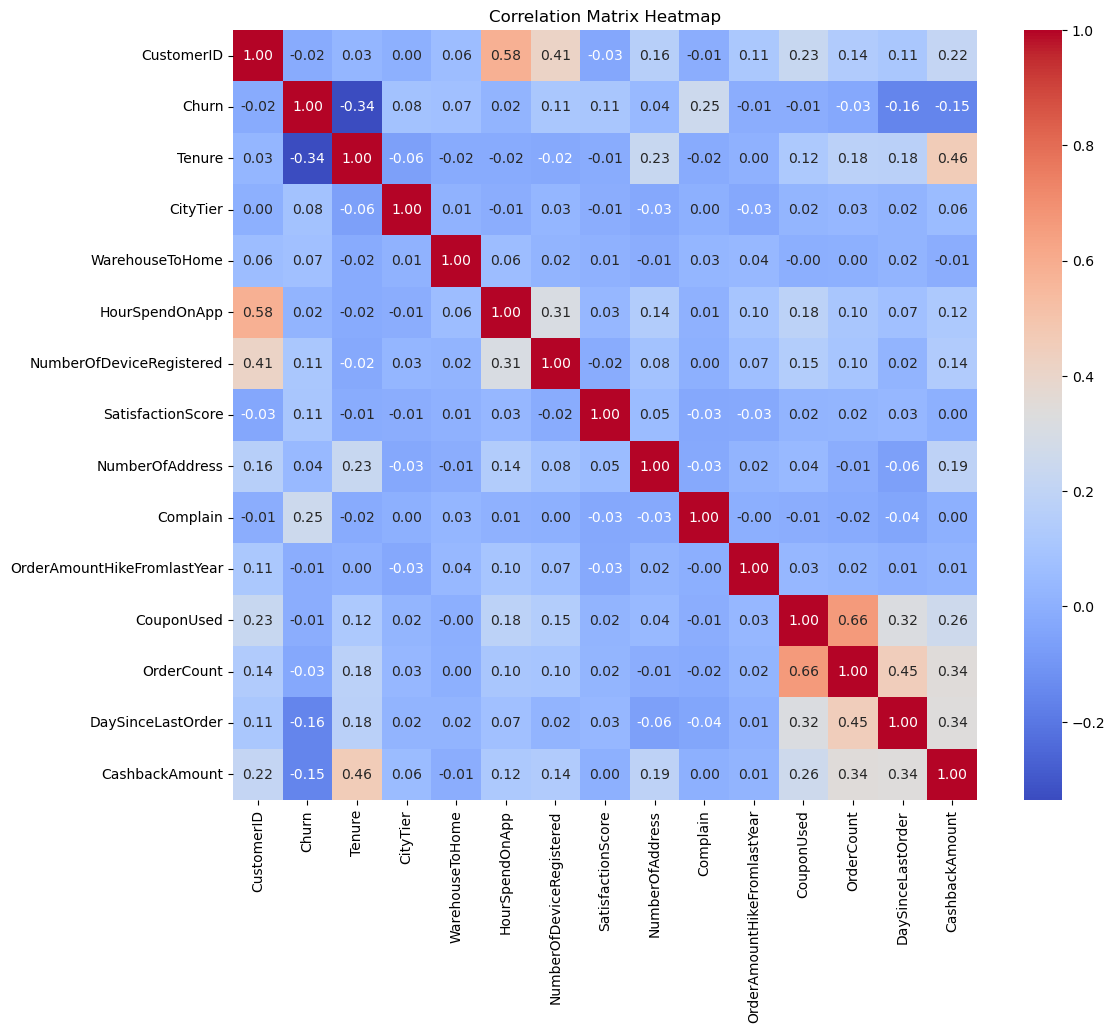

In [170]:
# Calculate the correlation matrix
correlation_matrix = uab.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [168]:
# Set correlation threshold
correlation_threshold = 0.7

# Find columns with high correlation
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Drop highly correlated columns
uab_no_multicollinearity = uab.drop(columns=highly_correlated_columns)

# Display the columns dropped due to multicollinearity
print(f"Columns dropped due to multicollinearity: {highly_correlated_columns}")

Columns dropped due to multicollinearity: set()


- CustomerId has correaltion with hourssepndonapp and numberofdevice registered.
- Tenure has relation with cashbackamount
- Dayssince last order has relation with ordercount and cashbackamount
- ordercount has relation with couponused and dayssincelastorder and cashbackamount

## Data Preprocessing and Feature Scaling

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  
# Import the classifier you want to use

# Assuming 'uab' is your DataFrame with features and target variable 'Churn'

# Separate features and target variable
X = uab.drop('Churn', axis=1)
y = uab['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Create a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and modeling steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'uab' is your DataFrame with features and target variable 'Churn'

# Separate features and target variable
X = uab.drop('Churn', axis=1)
y = uab['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create dummy variables for categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Standardize numerical columns using StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Now, X_train and X_test contain dummy variables for categorical columns and standardized numerical columns


## Model Building

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.88
Confusion Matrix:
[[917  24]
 [107  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       941
           1       0.76      0.42      0.54       185

    accuracy                           0.88      1126
   macro avg       0.83      0.70      0.74      1126
weighted avg       0.87      0.88      0.87      1126



In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'model' is the trained Logistic Regression model and 'X_test', 'y_test' are the test data
# Replace 'model' with your actual model if using a different algorithm

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Confusion Matrix:
[[917  24]
 [107  78]]
Accuracy: 0.88
Precision: 0.76
Recall: 0.42
F1 Score: 0.54


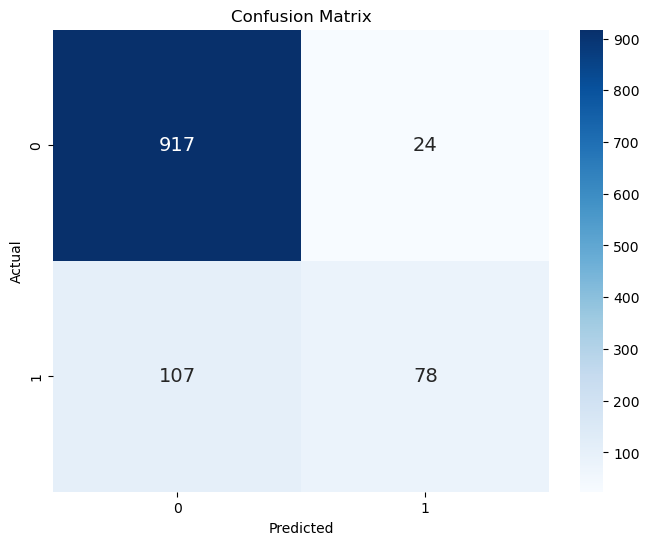

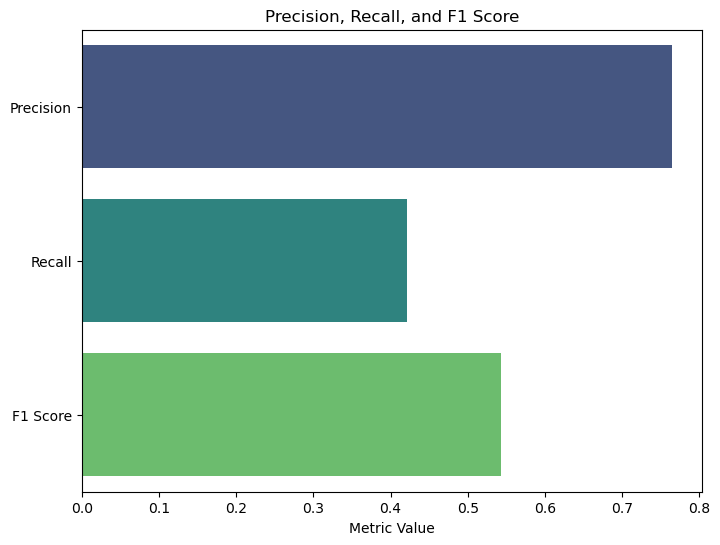

In [183]:
# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Bar Chart for Precision, Recall, and F1 Score
metrics_values = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics_values, y=metrics_names, palette='viridis')
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Metric Value')
plt.show()

1. Accuracy:

Value: 0.88 or 88%

Explanation: Accuracy is the ratio of correctly predicted instances to the total instances. In this case, the model correctly predicted 88% of the instances in the test set.

2. Confusion Matrix :

In [187]:
conf_matrix

array([[917,  24],
       [107,  78]])

#### Explanation:

- True Positives (TP): 78 - Instances correctly predicted as Churn (1)
- True Negatives (TN): 917 - Instances correctly predicted as Not Churn (0)
- False Positives (FP): 24 - Instances incorrectly predicted as Churn when they are Not Churn
- False Negatives (FN): 107 - Instances incorrectly predicted as Not Churn when they are Churn

In [197]:
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       941
           1       0.76      0.42      0.54       185

    accuracy                           0.88      1126
   macro avg       0.83      0.70      0.74      1126
weighted avg       0.87      0.88      0.87      1126



#### Explaination:

- Precision: 0.76 for Churn (1) - Out of all instances predicted as Churn, 76% were actually Churn.
- Recall: 0.42 for Churn (1) - Out of all actual Churn instances, the model correctly identified 42%.
- F1-Score: 0.54 for Churn (1) - The harmonic mean of precision and recall. It is useful when dealing with imbalanced datasets.
- Support: The number of actual occurrences of each class in the specified order.

#### Accuracy, Precision, Recall, and F1-Score:

- For Not Churn (0): High precision, high recall, and high F1-score, indicating good performance.
- For Churn (1): Moderate precision, low recall, and a moderate F1-score, indicating room for improvement.
#### Macro Avg and Weighted Avg:

- Macro Avg: The unweighted average of precision, recall, and F1-score for both classes.
- Weighted Avg: The average, weighted by the number of samples in each class.


In summary, the model performs well in predicting instances of Not Churn (0) but needs improvement in predicting instances of Churn (1), particularly in terms of recall. The macro and weighted averages provide an overall assessment across both classes.